In [1]:
import pandas as pd

# Đọc dữ liệu từ các file CSV
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [2]:
# Xem thông tin tổng quát về dữ liệu huấn luyện
print(train_data.info())

# Xem các giá trị thống kê mô tả của dữ liệu huấn luyện
print(train_data.describe())

# Xem vài dòng đầu tiên của dữ liệu huấn luyện
print(train_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9000 non-null   int64  
 1   Previous Scores                   9000 non-null   int64  
 2   Extracurricular Activities        9000 non-null   int64  
 3   Sleep Hours                       9000 non-null   int64  
 4   Sample Question Papers Practiced  9000 non-null   int64  
 5   Performance Index                 9000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 422.0 KB
None
       Hours Studied  Previous Scores  Extracurricular Activities  \
count    9000.000000      9000.000000                 9000.000000   
mean        4.976444        69.396111                    0.493667   
std         2.594647        17.369957                    0.499988   
min         1.000000        40.000000                    

In [3]:
# Xử lý các giá trị thiếu (nếu có)
train_data = train_data.dropna()
test_data = test_data.dropna()

# Chọn các biến đầu vào và biến mục tiêu
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
target = 'Performance Index'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 4.092549211630652
R^2 Score: 0.9891449661722603


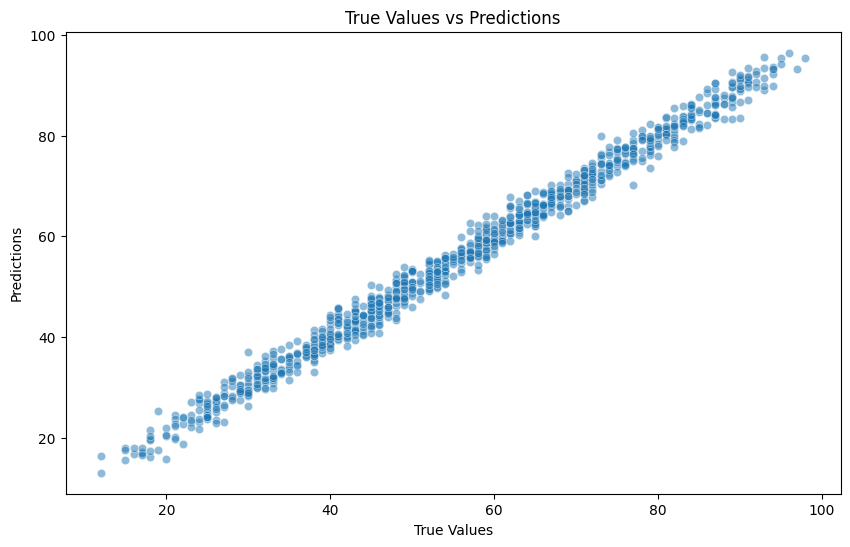

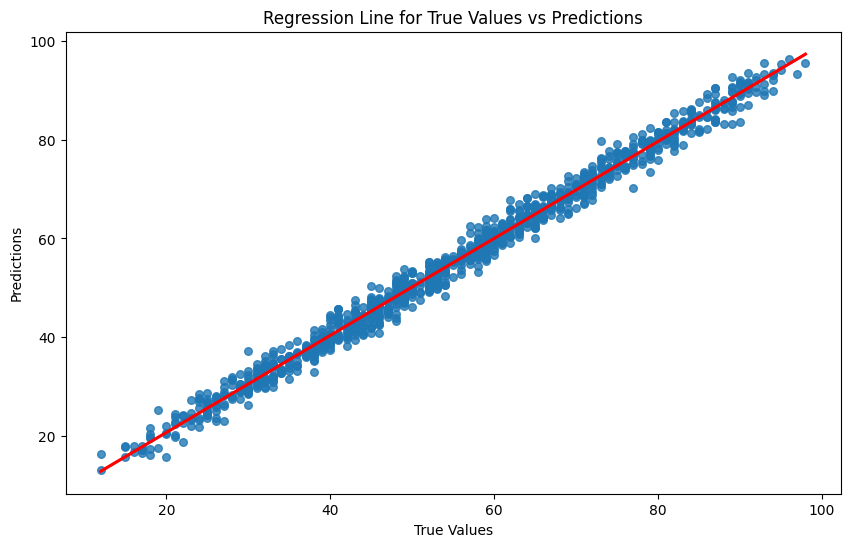

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ phân tán của giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# Vẽ đường hồi quy
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s':30}, line_kws={'color':'red'})
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regression Line for True Values vs Predictions')
plt.show()
